# GAN example

In [1]:
# import necessary packages

import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, Reshape, Conv2DTranspose, UpSampling2D

import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [2]:
noise_dim = 100 

In [3]:
# creating the dataset of real images
size = 32

def create_images_vert(num):
    samples = []
    for i in range(num):
        sample = np.zeros((size,size,1))
        for _ in range(10):
            x0 = random.randrange(5,size-5)
            sample = cv2.line(sample,(x0,0),(x0,size-1),(255,255,255),1)
        samples.append(sample)
    return samples

def create_images_diag(num):
    samples = []
    for i in range(num):
        sample = np.zeros((size,size,1))
        for _ in range(3):
            x0 = random.randrange(-size/2,size/2)
            sample = cv2.line(sample,(x0,0),(x0+32,32),(255,255,255),2)
        sample = cv2.GaussianBlur(sample,ksize=(5,5),sigmaX=100,sigmaY=100)
        sample = np.expand_dims(sample,axis=2)
        samples.append(sample)
    return samples

def load_images(dir):
    samples = []
    for image_file in os.listdir(dir):
        if image_file.endswith("jpg"):
            sample = cv2.imread(f"{dir}/{image_file}")
            sample = cv2.resize(sample, (32,32))
            sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
            sample = np.expand_dims(sample,axis=2)
            samples.append(sample)
    return samples

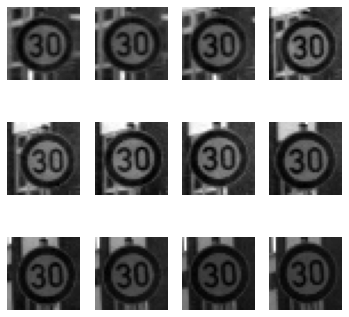

In [4]:
#samples = create_images_diag(1000)
#samples = create_images_vert(1000)
samples = load_images('signs')
samples = np.array(samples)
samples = samples/255

plt.figure(figsize=(6, 6))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(samples[i][:,:,0],cmap='gray')
    #plt.title(labels[i])
    plt.axis("off")

In [5]:
# Generator gets a noise vector of size noise_dim and generates an image of size (32 x 32 x 1)
# Our aim: we want the image to be as similar to real images (generated above) as possible
def make_generator_model():
    model = Sequential()
    model.add(Dense(8*8*256, use_bias=False, input_shape=(noise_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((8, 8, 256)))

    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    # output: 8 x 8 x 128

    model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    # output: 16 x 16 x 64

    model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"))
    model.add(Conv2D(1, (3, 3), strides=(1, 1), padding='same', use_bias=False, activation='sigmoid'))
    # output: 32 x 32 x 1 (our image)

    model.summary()
    return model




def make_generator_model_1():
    model = Sequential()
    model.add(Dense(8*8*256, use_bias=False, input_shape=(noise_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((8, 8, 256)))

    model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    
    #model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 8 x 8 x 128

    
    model.add(Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', use_bias=False))
    model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"))
    #model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 16 x 16 x 64

    model.add(Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='same', use_bias=False, activation='sigmoid'))
    model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"))
    #model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    #model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    # output: 32 x 32 x 1 (our image)

    model.summary()
    return model




def make_generator_model_org():
    model = Sequential()
    model.add(Dense(8*8*256, use_bias=False, input_shape=(noise_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((8, 8, 256)))

    model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    #model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 8 x 8 x 128

    
    model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    #model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 16 x 16 x 64

    model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='sigmoid'))
    #model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    #model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    # output: 32 x 32 x 1 (our image)

    model.summary()
    return model

generator = make_generator_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 128)         294912    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0

In [6]:
# Discriminator gets image of size (32 x 32 x 1) and decides if it is real or fake
# The result of the discriminator is used by generator to improve 'faking'

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 1]))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))
    #model.add(Dense(1))
    # output: one number 0-fake, 1-real
    model.summary()

    return model

discriminator = make_discriminator_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

In [7]:
# returns randomly choosen n samples

def sample_from_dataset(n,samples):
    prev_numbers = []
    new_samples = []
    while len(new_samples)<n:
        number = random.randrange(len(samples))
        if number in prev_numbers: continue
        prev_numbers.append(number)
        new_samples.append(samples[number])
    new_samples = np.array(new_samples,dtype=float)    

    return new_samples

In [8]:
# training parameters
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
cross_entropy = tf.keras.losses.BinaryCrossentropy()


In [13]:
from numpy.random import randn

def calc_ok(vct):
    ok = 0
    for x in vct: 
        if x>=0.5: 
            ok+=1 
    return ok

# The training step

history = []
##@tf.function
def do_step(images):
    batch_size = len(images)
    images = np.array(images)
    # create random noise for generator
    input_noise = randn(batch_size * noise_dim)
    input_noise = input_noise.reshape(batch_size, noise_dim)
    input_noise = tf.convert_to_tensor(input_noise)
    #noise = tf.random.normal([batch_size, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # generate fake image using noise
        generated_images = generator(input_noise, training=True)
        # evaluate fake images
        fake_output = discriminator(generated_images, training=True)
        fake_acc = (batch_size-calc_ok(fake_output))/batch_size
        # generator want all images to be accepted (output=1)!
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        
        # evaluate real images
        real_output = discriminator(images, training=True)
        real_acc = calc_ok(real_output)/batch_size
        # discriminator wants to classify all real images as 1 and fake images as 0
        real_loss = cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss # sum up both losses

    # calculate how to change generator to minimze its loss
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) # step 4. calculate the gradient of the losses
    # calculate how to change discriminator to minimze its loss
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # update weights for both networks
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) # step 5. Apply the optimizers and update weights
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    if epoch % 10 == 0:
        print("Epoch",epoch,'g_loss=',gen_loss.numpy(),'d_loss=',disc_loss.numpy(),"real_acc=",real_acc,"fake_acc=",fake_acc)
    history.append([gen_loss.numpy(),disc_loss.numpy(),real_acc,fake_acc])
    

Epoch 0 g_loss= 0.85425764 d_loss= 0.9914553 real_acc= 0.96 fake_acc= 0.84


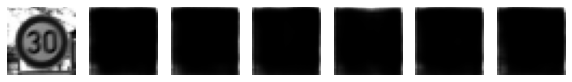

Epoch 10 g_loss= 0.6027681 d_loss= 1.2573524 real_acc= 0.98 fake_acc= 0.36
Epoch 20 g_loss= 0.59078646 d_loss= 1.648775 real_acc= 0.44 fake_acc= 0.32
Epoch 30 g_loss= 0.7268604 d_loss= 1.5785321 real_acc= 0.48 fake_acc= 0.56
Epoch 40 g_loss= 0.81307393 d_loss= 1.520721 real_acc= 0.54 fake_acc= 0.58
Epoch 50 g_loss= 0.8431113 d_loss= 1.2854688 real_acc= 0.62 fake_acc= 0.68


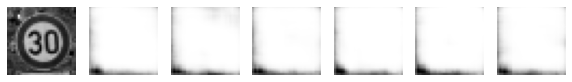

Epoch 60 g_loss= 0.83457756 d_loss= 1.3394024 real_acc= 0.54 fake_acc= 0.66
Epoch 70 g_loss= 0.9180385 d_loss= 1.264832 real_acc= 0.52 fake_acc= 0.9
Epoch 80 g_loss= 0.98465896 d_loss= 1.1485168 real_acc= 0.68 fake_acc= 0.98
Epoch 90 g_loss= 0.9881584 d_loss= 1.1056023 real_acc= 0.78 fake_acc= 0.96
Epoch 100 g_loss= 1.0253893 d_loss= 1.10155 real_acc= 0.76 fake_acc= 0.96


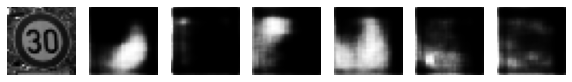

Epoch 110 g_loss= 1.0112977 d_loss= 1.0314069 real_acc= 0.8 fake_acc= 0.92
Epoch 120 g_loss= 1.0145487 d_loss= 1.0272009 real_acc= 0.82 fake_acc= 0.98
Epoch 130 g_loss= 1.0300869 d_loss= 0.97202533 real_acc= 0.78 fake_acc= 0.94
Epoch 140 g_loss= 1.025744 d_loss= 0.8793411 real_acc= 0.9 fake_acc= 0.96
Epoch 150 g_loss= 0.7297382 d_loss= 1.1916918 real_acc= 0.76 fake_acc= 0.46


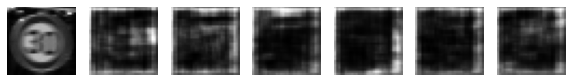

Epoch 160 g_loss= 0.57491565 d_loss= 1.748011 real_acc= 0.36 fake_acc= 0.24
Epoch 170 g_loss= 0.6646498 d_loss= 1.5115864 real_acc= 0.52 fake_acc= 0.4
Epoch 180 g_loss= 0.7873102 d_loss= 1.5107158 real_acc= 0.22 fake_acc= 0.7
Epoch 190 g_loss= 0.8575578 d_loss= 1.4215069 real_acc= 0.26 fake_acc= 0.9
Epoch 200 g_loss= 0.7649272 d_loss= 1.3423644 real_acc= 0.36 fake_acc= 0.76


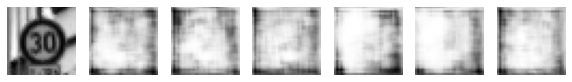

Epoch 210 g_loss= 0.83855474 d_loss= 1.2396338 real_acc= 0.58 fake_acc= 0.96
Epoch 220 g_loss= 0.78103375 d_loss= 1.3549966 real_acc= 0.58 fake_acc= 0.84
Epoch 230 g_loss= 0.6316627 d_loss= 1.4165711 real_acc= 0.62 fake_acc= 0.18
Epoch 240 g_loss= 0.7584172 d_loss= 1.3111049 real_acc= 0.66 fake_acc= 0.66
Epoch 250 g_loss= 0.8217078 d_loss= 1.251993 real_acc= 0.76 fake_acc= 0.76


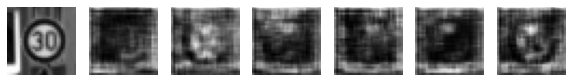

Epoch 260 g_loss= 0.72541964 d_loss= 1.4203796 real_acc= 0.4 fake_acc= 0.54
Epoch 270 g_loss= 0.58812857 d_loss= 1.5523856 real_acc= 0.4 fake_acc= 0.0
Epoch 280 g_loss= 0.66513056 d_loss= 1.4895706 real_acc= 0.3 fake_acc= 0.2
Epoch 290 g_loss= 0.7986064 d_loss= 1.4004791 real_acc= 0.22 fake_acc= 0.98
Epoch 300 g_loss= 0.75549036 d_loss= 1.3142827 real_acc= 0.64 fake_acc= 0.98


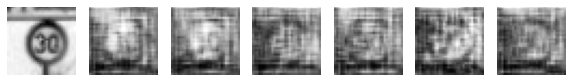

Epoch 310 g_loss= 0.77622414 d_loss= 1.4099493 real_acc= 0.44 fake_acc= 0.88
Epoch 320 g_loss= 0.6412436 d_loss= 1.3732338 real_acc= 0.74 fake_acc= 0.16
Epoch 330 g_loss= 0.6522922 d_loss= 1.4586257 real_acc= 0.48 fake_acc= 0.34
Epoch 340 g_loss= 0.6365765 d_loss= 1.5090787 real_acc= 0.42 fake_acc= 0.12
Epoch 350 g_loss= 0.58543 d_loss= 1.4764833 real_acc= 0.62 fake_acc= 0.0


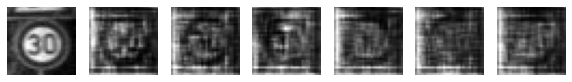

Epoch 360 g_loss= 0.6426747 d_loss= 1.4076345 real_acc= 0.56 fake_acc= 0.12
Epoch 370 g_loss= 0.6980447 d_loss= 1.3951433 real_acc= 0.44 fake_acc= 0.48
Epoch 380 g_loss= 0.6959523 d_loss= 1.2965505 real_acc= 0.74 fake_acc= 0.54
Epoch 390 g_loss= 0.7225426 d_loss= 1.3709681 real_acc= 0.44 fake_acc= 0.66
Epoch 400 g_loss= 0.68566626 d_loss= 1.4439917 real_acc= 0.28 fake_acc= 0.38


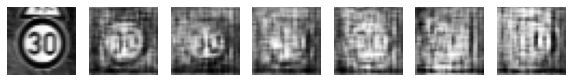

Epoch 410 g_loss= 0.6508982 d_loss= 1.51204 real_acc= 0.22 fake_acc= 0.16
Epoch 420 g_loss= 0.65885985 d_loss= 1.5159863 real_acc= 0.14 fake_acc= 0.22
Epoch 430 g_loss= 0.64934087 d_loss= 1.4720495 real_acc= 0.3 fake_acc= 0.08
Epoch 440 g_loss= 0.6896242 d_loss= 1.4220934 real_acc= 0.28 fake_acc= 0.4
Epoch 450 g_loss= 0.6942523 d_loss= 1.406563 real_acc= 0.36 fake_acc= 0.5


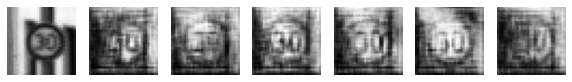

Epoch 460 g_loss= 0.726545 d_loss= 1.3707047 real_acc= 0.5 fake_acc= 0.72
Epoch 470 g_loss= 0.72249925 d_loss= 1.3740258 real_acc= 0.52 fake_acc= 0.82
Epoch 480 g_loss= 0.677066 d_loss= 1.3901539 real_acc= 0.66 fake_acc= 0.34
Epoch 490 g_loss= 0.7221432 d_loss= 1.4141328 real_acc= 0.36 fake_acc= 0.74
Epoch 500 g_loss= 0.65525454 d_loss= 1.4373271 real_acc= 0.56 fake_acc= 0.2


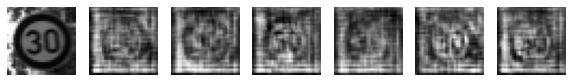

Epoch 510 g_loss= 0.7224563 d_loss= 1.4145733 real_acc= 0.32 fake_acc= 0.66
Epoch 520 g_loss= 0.68341696 d_loss= 1.4126668 real_acc= 0.58 fake_acc= 0.42
Epoch 530 g_loss= 0.65672475 d_loss= 1.4435024 real_acc= 0.56 fake_acc= 0.12
Epoch 540 g_loss= 0.7254726 d_loss= 1.3922005 real_acc= 0.5 fake_acc= 0.78
Epoch 550 g_loss= 0.6813428 d_loss= 1.3789908 real_acc= 0.64 fake_acc= 0.34


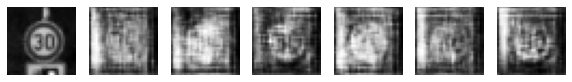

Epoch 560 g_loss= 0.7427904 d_loss= 1.3335876 real_acc= 0.56 fake_acc= 0.88
Epoch 570 g_loss= 0.7003695 d_loss= 1.335523 real_acc= 0.78 fake_acc= 0.52
Epoch 580 g_loss= 0.6653358 d_loss= 1.3570172 real_acc= 0.82 fake_acc= 0.22
Epoch 590 g_loss= 0.6445361 d_loss= 1.4053223 real_acc= 0.7 fake_acc= 0.04
Epoch 600 g_loss= 0.6239413 d_loss= 1.4259856 real_acc= 0.66 fake_acc= 0.02


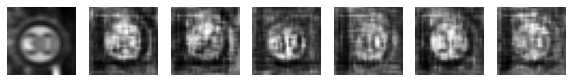

Epoch 610 g_loss= 0.6173317 d_loss= 1.4595894 real_acc= 0.52 fake_acc= 0.0
Epoch 620 g_loss= 0.61013037 d_loss= 1.464047 real_acc= 0.64 fake_acc= 0.0
Epoch 630 g_loss= 0.62494034 d_loss= 1.4362513 real_acc= 0.66 fake_acc= 0.0
Epoch 640 g_loss= 0.67651665 d_loss= 1.4096675 real_acc= 0.42 fake_acc= 0.22
Epoch 650 g_loss= 0.7027866 d_loss= 1.3625702 real_acc= 0.6 fake_acc= 0.56


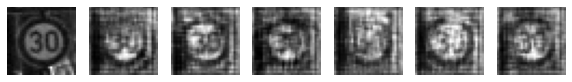

Epoch 660 g_loss= 0.6873348 d_loss= 1.3509054 real_acc= 0.86 fake_acc= 0.34
Epoch 670 g_loss= 0.73394585 d_loss= 1.3226666 real_acc= 0.6 fake_acc= 0.92
Epoch 680 g_loss= 0.7516423 d_loss= 1.3237936 real_acc= 0.44 fake_acc= 1.0
Epoch 690 g_loss= 0.73598933 d_loss= 1.3351765 real_acc= 0.52 fake_acc= 0.92
Epoch 700 g_loss= 0.71116376 d_loss= 1.3970522 real_acc= 0.3 fake_acc= 0.72


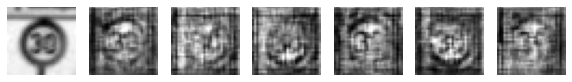

Epoch 710 g_loss= 0.7176889 d_loss= 1.407237 real_acc= 0.22 fake_acc= 0.72
Epoch 720 g_loss= 0.7169026 d_loss= 1.4296553 real_acc= 0.02 fake_acc= 0.7
Epoch 730 g_loss= 0.71620667 d_loss= 1.42242 real_acc= 0.1 fake_acc= 0.8
Epoch 740 g_loss= 0.75125444 d_loss= 1.3985431 real_acc= 0.16 fake_acc= 0.98
Epoch 750 g_loss= 0.72977126 d_loss= 1.3624084 real_acc= 0.54 fake_acc= 0.82


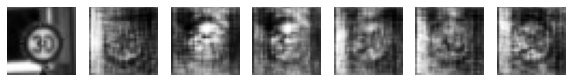

Epoch 760 g_loss= 0.76039827 d_loss= 1.3236871 real_acc= 0.46 fake_acc= 0.94
Epoch 770 g_loss= 0.76024336 d_loss= 1.3136358 real_acc= 0.62 fake_acc= 0.94
Epoch 780 g_loss= 0.7544911 d_loss= 1.3085086 real_acc= 0.64 fake_acc= 0.92
Epoch 790 g_loss= 0.70712847 d_loss= 1.3354249 real_acc= 0.74 fake_acc= 0.64
Epoch 800 g_loss= 0.62427187 d_loss= 1.4143722 real_acc= 0.7 fake_acc= 0.06


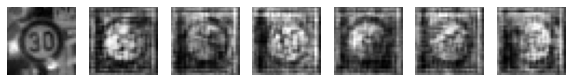

Epoch 810 g_loss= 0.6738787 d_loss= 1.4535918 real_acc= 0.34 fake_acc= 0.34
Epoch 820 g_loss= 0.6424746 d_loss= 1.4423083 real_acc= 0.56 fake_acc= 0.08
Epoch 830 g_loss= 0.70303816 d_loss= 1.3841398 real_acc= 0.5 fake_acc= 0.62
Epoch 840 g_loss= 0.6958365 d_loss= 1.346817 real_acc= 0.76 fake_acc= 0.56
Epoch 850 g_loss= 0.7072072 d_loss= 1.3391752 real_acc= 0.76 fake_acc= 0.64


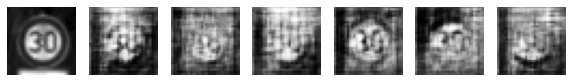

Epoch 860 g_loss= 0.66713256 d_loss= 1.3486953 real_acc= 0.88 fake_acc= 0.2
Epoch 870 g_loss= 0.6524558 d_loss= 1.354094 real_acc= 0.9 fake_acc= 0.04
Epoch 880 g_loss= 0.63934165 d_loss= 1.3434565 real_acc= 0.88 fake_acc= 0.04
Epoch 890 g_loss= 0.6500217 d_loss= 1.3710325 real_acc= 0.68 fake_acc= 0.16
Epoch 900 g_loss= 0.6934324 d_loss= 1.3492345 real_acc= 0.54 fake_acc= 0.4


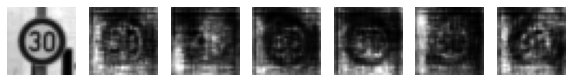

Epoch 910 g_loss= 0.7261293 d_loss= 1.3422341 real_acc= 0.56 fake_acc= 0.56
Epoch 920 g_loss= 0.7650304 d_loss= 1.3485959 real_acc= 0.44 fake_acc= 0.74
Epoch 930 g_loss= 0.7502904 d_loss= 1.3861169 real_acc= 0.28 fake_acc= 0.62
Epoch 940 g_loss= 0.77979887 d_loss= 1.3684952 real_acc= 0.26 fake_acc= 0.94
Epoch 950 g_loss= 0.7762692 d_loss= 1.3906825 real_acc= 0.16 fake_acc= 0.94


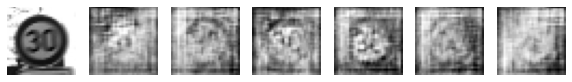

Epoch 960 g_loss= 0.8220899 d_loss= 1.3978509 real_acc= 0.18 fake_acc= 0.96
Epoch 970 g_loss= 0.77678376 d_loss= 1.396779 real_acc= 0.34 fake_acc= 0.98
Epoch 980 g_loss= 0.7453241 d_loss= 1.4194363 real_acc= 0.46 fake_acc= 0.84
Epoch 990 g_loss= 0.751097 d_loss= 1.2964292 real_acc= 0.74 fake_acc= 0.9
Epoch 1000 g_loss= 0.76151776 d_loss= 1.2190679 real_acc= 0.84 fake_acc= 0.8


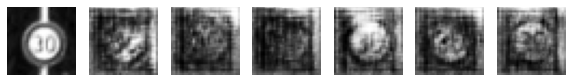

Epoch 1010 g_loss= 0.6877501 d_loss= 1.3417923 real_acc= 0.7 fake_acc= 0.46
Epoch 1020 g_loss= 0.58774275 d_loss= 1.3781757 real_acc= 0.82 fake_acc= 0.0
Epoch 1030 g_loss= 0.6751682 d_loss= 1.4011989 real_acc= 0.6 fake_acc= 0.36
Epoch 1040 g_loss= 0.6831701 d_loss= 1.3618212 real_acc= 0.64 fake_acc= 0.48
Epoch 1050 g_loss= 0.73947227 d_loss= 1.3768709 real_acc= 0.38 fake_acc= 0.88


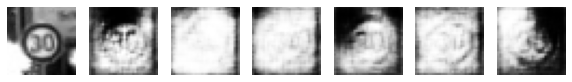

Epoch 1060 g_loss= 0.7098968 d_loss= 1.3908134 real_acc= 0.48 fake_acc= 0.64
Epoch 1070 g_loss= 0.7844495 d_loss= 1.3321387 real_acc= 0.42 fake_acc= 0.9
Epoch 1080 g_loss= 0.6948215 d_loss= 1.3446898 real_acc= 0.72 fake_acc= 0.4
Epoch 1090 g_loss= 0.7455207 d_loss= 1.3502394 real_acc= 0.44 fake_acc= 0.76
Epoch 1100 g_loss= 0.6575315 d_loss= 1.3881743 real_acc= 0.68 fake_acc= 0.18


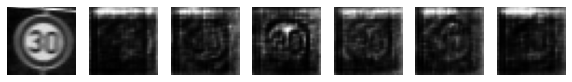

Epoch 1110 g_loss= 0.6949853 d_loss= 1.3798397 real_acc= 0.6 fake_acc= 0.5
Epoch 1120 g_loss= 0.65933144 d_loss= 1.3596271 real_acc= 0.9 fake_acc= 0.1
Epoch 1130 g_loss= 0.72070116 d_loss= 1.3492911 real_acc= 0.58 fake_acc= 0.72
Epoch 1140 g_loss= 0.7091056 d_loss= 1.2893167 real_acc= 0.84 fake_acc= 0.58
Epoch 1150 g_loss= 0.8034564 d_loss= 1.2486156 real_acc= 0.74 fake_acc= 0.96


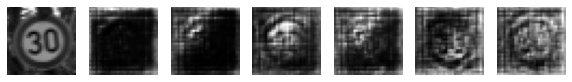

Epoch 1160 g_loss= 0.792907 d_loss= 1.2388185 real_acc= 0.64 fake_acc= 0.9
Epoch 1170 g_loss= 0.75922745 d_loss= 1.382834 real_acc= 0.38 fake_acc= 0.74
Epoch 1180 g_loss= 0.76946104 d_loss= 1.4253365 real_acc= 0.32 fake_acc= 0.86
Epoch 1190 g_loss= 0.731009 d_loss= 1.3699782 real_acc= 0.6 fake_acc= 0.66
Epoch 1200 g_loss= 0.71310544 d_loss= 1.439306 real_acc= 0.46 fake_acc= 0.52


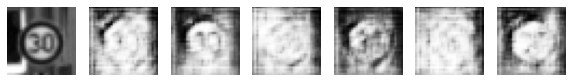

Epoch 1210 g_loss= 0.71452856 d_loss= 1.4506433 real_acc= 0.5 fake_acc= 0.62
Epoch 1220 g_loss= 0.628297 d_loss= 1.3794014 real_acc= 0.78 fake_acc= 0.06
Epoch 1230 g_loss= 0.7431148 d_loss= 1.3415118 real_acc= 0.44 fake_acc= 1.0
Epoch 1240 g_loss= 0.7525108 d_loss= 1.3036555 real_acc= 0.52 fake_acc= 0.74
Epoch 1250 g_loss= 0.7643612 d_loss= 1.3605247 real_acc= 0.36 fake_acc= 0.66


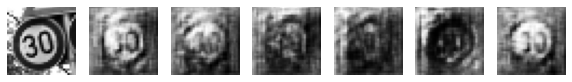

Epoch 1260 g_loss= 0.71546066 d_loss= 1.4231248 real_acc= 0.46 fake_acc= 0.58
Epoch 1270 g_loss= 0.7630583 d_loss= 1.4437823 real_acc= 0.3 fake_acc= 0.72
Epoch 1280 g_loss= 0.77454054 d_loss= 1.3264197 real_acc= 0.56 fake_acc= 0.66
Epoch 1290 g_loss= 0.762146 d_loss= 1.3860726 real_acc= 0.4 fake_acc= 0.64
Epoch 1300 g_loss= 0.7034116 d_loss= 1.3679011 real_acc= 0.62 fake_acc= 0.56


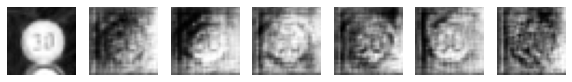

Epoch 1310 g_loss= 0.71681875 d_loss= 1.318806 real_acc= 0.76 fake_acc= 0.64
Epoch 1320 g_loss= 0.6704529 d_loss= 1.3471193 real_acc= 0.68 fake_acc= 0.4
Epoch 1330 g_loss= 0.6650453 d_loss= 1.396704 real_acc= 0.62 fake_acc= 0.42
Epoch 1340 g_loss= 0.6176558 d_loss= 1.3853524 real_acc= 0.74 fake_acc= 0.16
Epoch 1350 g_loss= 0.7685192 d_loss= 1.3098469 real_acc= 0.38 fake_acc= 0.92


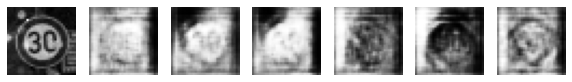

Epoch 1360 g_loss= 0.7601079 d_loss= 1.2344538 real_acc= 0.66 fake_acc= 0.9
Epoch 1370 g_loss= 0.85795873 d_loss= 1.2040997 real_acc= 0.64 fake_acc= 0.98
Epoch 1380 g_loss= 0.79450315 d_loss= 1.2743316 real_acc= 0.5 fake_acc= 0.74
Epoch 1390 g_loss= 0.7437832 d_loss= 1.3125635 real_acc= 0.6 fake_acc= 0.56
Epoch 1400 g_loss= 0.6097673 d_loss= 1.5312297 real_acc= 0.34 fake_acc= 0.2


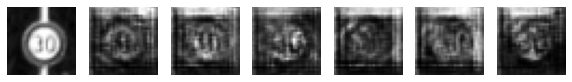

Epoch 1410 g_loss= 0.6372999 d_loss= 1.5218289 real_acc= 0.24 fake_acc= 0.22
Epoch 1420 g_loss= 0.74967283 d_loss= 1.4194486 real_acc= 0.22 fake_acc= 0.76
Epoch 1430 g_loss= 0.82463884 d_loss= 1.2532816 real_acc= 0.58 fake_acc= 0.98
Epoch 1440 g_loss= 0.93719083 d_loss= 1.0830197 real_acc= 0.78 fake_acc= 0.96
Epoch 1450 g_loss= 0.82867813 d_loss= 1.2051082 real_acc= 0.68 fake_acc= 0.64


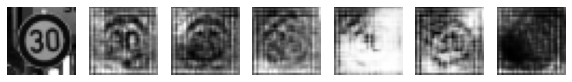

Epoch 1460 g_loss= 0.7611299 d_loss= 1.322572 real_acc= 0.66 fake_acc= 0.54
Epoch 1470 g_loss= 0.775572 d_loss= 1.3344063 real_acc= 0.64 fake_acc= 0.8
Epoch 1480 g_loss= 0.7022247 d_loss= 1.2817864 real_acc= 0.88 fake_acc= 0.48
Epoch 1490 g_loss= 0.7133385 d_loss= 1.3468364 real_acc= 0.64 fake_acc= 0.64
Epoch 1500 g_loss= 0.77554107 d_loss= 1.3383248 real_acc= 0.46 fake_acc= 0.8


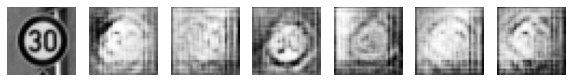

Epoch 1510 g_loss= 0.6799212 d_loss= 1.3206862 real_acc= 0.86 fake_acc= 0.4
Epoch 1520 g_loss= 0.6586867 d_loss= 1.3088408 real_acc= 0.86 fake_acc= 0.28
Epoch 1530 g_loss= 0.7175326 d_loss= 1.3139405 real_acc= 0.56 fake_acc= 0.6
Epoch 1540 g_loss= 0.7548599 d_loss= 1.3089181 real_acc= 0.48 fake_acc= 0.62
Epoch 1550 g_loss= 0.74161446 d_loss= 1.3782591 real_acc= 0.44 fake_acc= 0.66


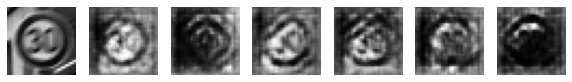

Epoch 1560 g_loss= 0.698552 d_loss= 1.4221551 real_acc= 0.34 fake_acc= 0.52
Epoch 1570 g_loss= 0.7452983 d_loss= 1.3954675 real_acc= 0.44 fake_acc= 0.7
Epoch 1580 g_loss= 0.8684338 d_loss= 1.2815588 real_acc= 0.54 fake_acc= 0.98
Epoch 1590 g_loss= 0.760441 d_loss= 1.2777517 real_acc= 0.62 fake_acc= 0.84
Epoch 1600 g_loss= 0.76822436 d_loss= 1.3076665 real_acc= 0.64 fake_acc= 0.68


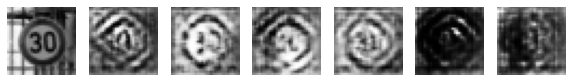

Epoch 1610 g_loss= 0.5564388 d_loss= 1.5956793 real_acc= 0.62 fake_acc= 0.2
Epoch 1620 g_loss= 0.6220166 d_loss= 1.4949477 real_acc= 0.52 fake_acc= 0.2
Epoch 1630 g_loss= 0.71052355 d_loss= 1.3840147 real_acc= 0.58 fake_acc= 0.5
Epoch 1640 g_loss= 0.76106185 d_loss= 1.3604184 real_acc= 0.52 fake_acc= 0.84
Epoch 1650 g_loss= 0.79351944 d_loss= 1.3563633 real_acc= 0.44 fake_acc= 0.7


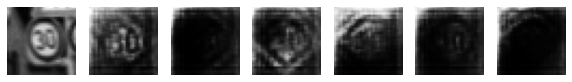

Epoch 1660 g_loss= 0.70832336 d_loss= 1.32949 real_acc= 0.68 fake_acc= 0.48
Epoch 1670 g_loss= 0.70681816 d_loss= 1.3467212 real_acc= 0.62 fake_acc= 0.5
Epoch 1680 g_loss= 0.6697606 d_loss= 1.3671434 real_acc= 0.68 fake_acc= 0.26
Epoch 1690 g_loss= 0.66609573 d_loss= 1.3502722 real_acc= 0.68 fake_acc= 0.24
Epoch 1700 g_loss= 0.675058 d_loss= 1.4048073 real_acc= 0.52 fake_acc= 0.42


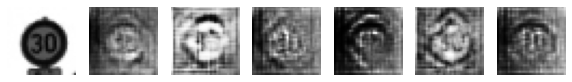

Epoch 1710 g_loss= 0.71074885 d_loss= 1.4041805 real_acc= 0.34 fake_acc= 0.56
Epoch 1720 g_loss= 0.7582555 d_loss= 1.4328053 real_acc= 0.2 fake_acc= 0.8
Epoch 1730 g_loss= 0.7279799 d_loss= 1.3715405 real_acc= 0.46 fake_acc= 0.7
Epoch 1740 g_loss= 0.707852 d_loss= 1.3508387 real_acc= 0.64 fake_acc= 0.58
Epoch 1750 g_loss= 0.70044863 d_loss= 1.3693862 real_acc= 0.62 fake_acc= 0.46


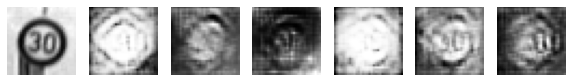

Epoch 1760 g_loss= 0.7255743 d_loss= 1.3418063 real_acc= 0.64 fake_acc= 0.56
Epoch 1770 g_loss= 0.6552597 d_loss= 1.3937845 real_acc= 0.68 fake_acc= 0.3
Epoch 1780 g_loss= 0.7133351 d_loss= 1.4001335 real_acc= 0.38 fake_acc= 0.52
Epoch 1790 g_loss= 0.6462276 d_loss= 1.4311011 real_acc= 0.54 fake_acc= 0.28
Epoch 1800 g_loss= 0.6777922 d_loss= 1.406863 real_acc= 0.44 fake_acc= 0.36


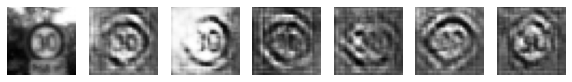

Epoch 1810 g_loss= 0.6831528 d_loss= 1.3949172 real_acc= 0.58 fake_acc= 0.48
Epoch 1820 g_loss= 0.7153095 d_loss= 1.3742111 real_acc= 0.38 fake_acc= 0.64
Epoch 1830 g_loss= 0.71343344 d_loss= 1.3816338 real_acc= 0.42 fake_acc= 0.74
Epoch 1840 g_loss= 0.72047114 d_loss= 1.3369732 real_acc= 0.56 fake_acc= 0.72
Epoch 1850 g_loss= 0.7593161 d_loss= 1.3454258 real_acc= 0.46 fake_acc= 0.76


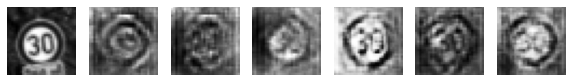

Epoch 1860 g_loss= 0.7983647 d_loss= 1.3321347 real_acc= 0.52 fake_acc= 0.9
Epoch 1870 g_loss= 0.7443617 d_loss= 1.3262684 real_acc= 0.62 fake_acc= 0.56
Epoch 1880 g_loss= 0.6658542 d_loss= 1.3963397 real_acc= 0.64 fake_acc= 0.38
Epoch 1890 g_loss= 0.7122858 d_loss= 1.3539803 real_acc= 0.72 fake_acc= 0.54
Epoch 1900 g_loss= 0.62421954 d_loss= 1.3903022 real_acc= 0.74 fake_acc= 0.12


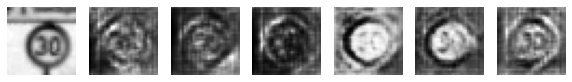

Epoch 1910 g_loss= 0.65216035 d_loss= 1.3997215 real_acc= 0.68 fake_acc= 0.26
Epoch 1920 g_loss= 0.69957685 d_loss= 1.3858051 real_acc= 0.52 fake_acc= 0.46
Epoch 1930 g_loss= 0.70883226 d_loss= 1.3435104 real_acc= 0.56 fake_acc= 0.7
Epoch 1940 g_loss= 0.7779583 d_loss= 1.3517379 real_acc= 0.26 fake_acc= 0.78
Epoch 1950 g_loss= 0.7245311 d_loss= 1.3598764 real_acc= 0.54 fake_acc= 0.58


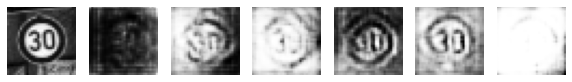

Epoch 1960 g_loss= 0.7553236 d_loss= 1.3803357 real_acc= 0.28 fake_acc= 0.76
Epoch 1970 g_loss= 0.7109668 d_loss= 1.3519335 real_acc= 0.56 fake_acc= 0.64
Epoch 1980 g_loss= 0.701277 d_loss= 1.3731096 real_acc= 0.62 fake_acc= 0.5
Epoch 1990 g_loss= 0.7191832 d_loss= 1.3819805 real_acc= 0.5 fake_acc= 0.5
Epoch 2000 g_loss= 0.70480764 d_loss= 1.371057 real_acc= 0.58 fake_acc= 0.5


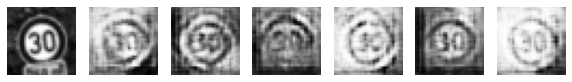

Epoch 2010 g_loss= 0.71396846 d_loss= 1.3623159 real_acc= 0.6 fake_acc= 0.46
Epoch 2020 g_loss= 0.709676 d_loss= 1.3643782 real_acc= 0.58 fake_acc= 0.52
Epoch 2030 g_loss= 0.6502475 d_loss= 1.3763041 real_acc= 0.74 fake_acc= 0.12
Epoch 2040 g_loss= 0.6613701 d_loss= 1.3539639 real_acc= 0.78 fake_acc= 0.2
Epoch 2050 g_loss= 0.691548 d_loss= 1.3119624 real_acc= 0.78 fake_acc= 0.46


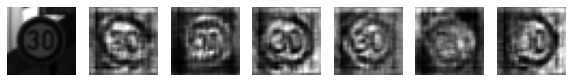

Epoch 2060 g_loss= 0.7219841 d_loss= 1.246426 real_acc= 0.8 fake_acc= 0.68
Epoch 2070 g_loss= 0.7886503 d_loss= 1.3195187 real_acc= 0.36 fake_acc= 0.82
Epoch 2080 g_loss= 0.71844053 d_loss= 1.385509 real_acc= 0.36 fake_acc= 0.6
Epoch 2090 g_loss= 0.67937165 d_loss= 1.4830737 real_acc= 0.2 fake_acc= 0.38
Epoch 2100 g_loss= 0.740985 d_loss= 1.5859089 real_acc= 0.06 fake_acc= 0.54


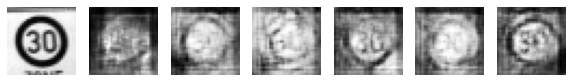

Epoch 2110 g_loss= 0.65443504 d_loss= 1.5107949 real_acc= 0.38 fake_acc= 0.24
Epoch 2120 g_loss= 0.649297 d_loss= 1.4553769 real_acc= 0.46 fake_acc= 0.28
Epoch 2130 g_loss= 0.68672526 d_loss= 1.3914316 real_acc= 0.56 fake_acc= 0.44
Epoch 2140 g_loss= 0.6982201 d_loss= 1.2852286 real_acc= 0.9 fake_acc= 0.52
Epoch 2150 g_loss= 0.84474105 d_loss= 1.2755485 real_acc= 0.48 fake_acc= 0.8


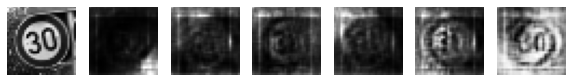

Epoch 2160 g_loss= 0.7560335 d_loss= 1.3765512 real_acc= 0.42 fake_acc= 0.7
Epoch 2170 g_loss= 0.6941779 d_loss= 1.4302471 real_acc= 0.52 fake_acc= 0.5
Epoch 2180 g_loss= 0.66420174 d_loss= 1.4326122 real_acc= 0.48 fake_acc= 0.22
Epoch 2190 g_loss= 0.67238647 d_loss= 1.4211378 real_acc= 0.56 fake_acc= 0.38
Epoch 2200 g_loss= 0.7117266 d_loss= 1.3255908 real_acc= 0.7 fake_acc= 0.56


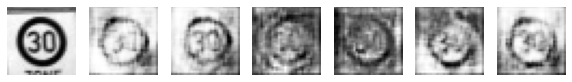

Epoch 2210 g_loss= 0.71334344 d_loss= 1.3691999 real_acc= 0.6 fake_acc= 0.54
Epoch 2220 g_loss= 0.72248197 d_loss= 1.3743048 real_acc= 0.56 fake_acc= 0.56
Epoch 2230 g_loss= 0.6663946 d_loss= 1.4260108 real_acc= 0.58 fake_acc= 0.3
Epoch 2240 g_loss= 0.7142931 d_loss= 1.3513203 real_acc= 0.6 fake_acc= 0.6
Epoch 2250 g_loss= 0.7002727 d_loss= 1.3321177 real_acc= 0.64 fake_acc= 0.48


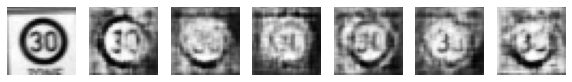

Epoch 2260 g_loss= 0.72441137 d_loss= 1.2925279 real_acc= 0.78 fake_acc= 0.66
Epoch 2270 g_loss= 0.64635384 d_loss= 1.3430307 real_acc= 0.88 fake_acc= 0.3
Epoch 2280 g_loss= 0.7074862 d_loss= 1.358427 real_acc= 0.56 fake_acc= 0.52
Epoch 2290 g_loss= 0.81549627 d_loss= 1.4045999 real_acc= 0.36 fake_acc= 0.6
Epoch 2300 g_loss= 0.743717 d_loss= 1.3836303 real_acc= 0.54 fake_acc= 0.46


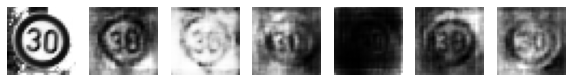

Epoch 2310 g_loss= 0.6983038 d_loss= 1.4069247 real_acc= 0.44 fake_acc= 0.34
Epoch 2320 g_loss= 0.7216805 d_loss= 1.3742788 real_acc= 0.42 fake_acc= 0.68
Epoch 2330 g_loss= 0.721168 d_loss= 1.352295 real_acc= 0.52 fake_acc= 0.7
Epoch 2340 g_loss= 0.74560827 d_loss= 1.3278669 real_acc= 0.5 fake_acc= 0.74
Epoch 2350 g_loss= 0.74883914 d_loss= 1.3445706 real_acc= 0.5 fake_acc= 0.6


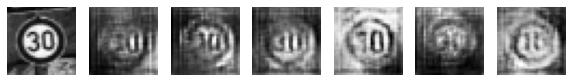

Epoch 2360 g_loss= 0.70652634 d_loss= 1.3500025 real_acc= 0.64 fake_acc= 0.42
Epoch 2370 g_loss= 0.74895906 d_loss= 1.3174878 real_acc= 0.6 fake_acc= 0.62
Epoch 2380 g_loss= 0.73216087 d_loss= 1.3201417 real_acc= 0.64 fake_acc= 0.54
Epoch 2390 g_loss= 0.69579154 d_loss= 1.340729 real_acc= 0.74 fake_acc= 0.38
Epoch 2400 g_loss= 0.6901534 d_loss= 1.3737092 real_acc= 0.68 fake_acc= 0.52


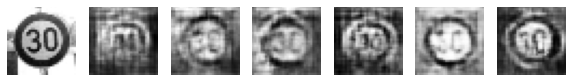

Epoch 2410 g_loss= 0.6621051 d_loss= 1.4268165 real_acc= 0.62 fake_acc= 0.34
Epoch 2420 g_loss= 0.66819227 d_loss= 1.462698 real_acc= 0.36 fake_acc= 0.4
Epoch 2430 g_loss= 0.703603 d_loss= 1.3588486 real_acc= 0.52 fake_acc= 0.48
Epoch 2440 g_loss= 0.7851193 d_loss= 1.3161507 real_acc= 0.52 fake_acc= 0.88
Epoch 2450 g_loss= 0.83759654 d_loss= 1.2847147 real_acc= 0.52 fake_acc= 0.94


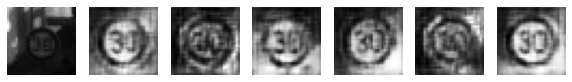

Epoch 2460 g_loss= 0.7546792 d_loss= 1.377821 real_acc= 0.44 fake_acc= 0.52
Epoch 2470 g_loss= 0.6631983 d_loss= 1.3855379 real_acc= 0.62 fake_acc= 0.32
Epoch 2480 g_loss= 0.6265344 d_loss= 1.4815471 real_acc= 0.62 fake_acc= 0.2
Epoch 2490 g_loss= 0.5611983 d_loss= 1.4975009 real_acc= 0.62 fake_acc= 0.06
Epoch 2500 g_loss= 0.64668775 d_loss= 1.4888201 real_acc= 0.44 fake_acc= 0.36


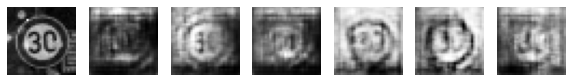

Epoch 2510 g_loss= 0.75397706 d_loss= 1.3483133 real_acc= 0.48 fake_acc= 0.64
Epoch 2520 g_loss= 0.81979173 d_loss= 1.3149828 real_acc= 0.46 fake_acc= 0.82
Epoch 2530 g_loss= 0.7797322 d_loss= 1.2617126 real_acc= 0.7 fake_acc= 0.68
Epoch 2540 g_loss= 0.7107769 d_loss= 1.4150708 real_acc= 0.52 fake_acc= 0.62
Epoch 2550 g_loss= 0.7019839 d_loss= 1.4127269 real_acc= 0.42 fake_acc= 0.48


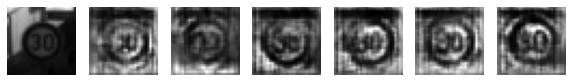

Epoch 2560 g_loss= 0.7510475 d_loss= 1.384424 real_acc= 0.4 fake_acc= 0.6
Epoch 2570 g_loss= 0.8873315 d_loss= 1.3017317 real_acc= 0.36 fake_acc= 0.86
Epoch 2580 g_loss= 0.9953263 d_loss= 1.3132014 real_acc= 0.48 fake_acc= 0.98
Epoch 2590 g_loss= 0.9120325 d_loss= 1.4172604 real_acc= 0.5 fake_acc= 0.78
Epoch 2600 g_loss= 0.8664386 d_loss= 1.468523 real_acc= 0.42 fake_acc= 0.7


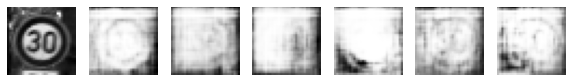

Epoch 2610 g_loss= 0.7612706 d_loss= 1.4551926 real_acc= 0.58 fake_acc= 0.5
Epoch 2620 g_loss= 0.7938574 d_loss= 1.2639229 real_acc= 0.68 fake_acc= 0.56
Epoch 2630 g_loss= 0.70274794 d_loss= 1.1843472 real_acc= 0.84 fake_acc= 0.5
Epoch 2640 g_loss= 0.69809604 d_loss= 1.2034042 real_acc= 0.84 fake_acc= 0.48
Epoch 2650 g_loss= 0.58877474 d_loss= 1.3016784 real_acc= 0.92 fake_acc= 0.14


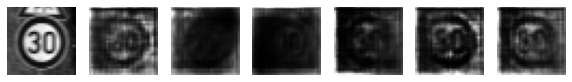

Epoch 2660 g_loss= 0.73494095 d_loss= 1.2024844 real_acc= 0.82 fake_acc= 0.56
Epoch 2670 g_loss= 0.94379115 d_loss= 0.99289274 real_acc= 0.8 fake_acc= 0.86
Epoch 2680 g_loss= 0.9514443 d_loss= 1.0711918 real_acc= 0.68 fake_acc= 0.72
Epoch 2690 g_loss= 0.92619735 d_loss= 1.0176216 real_acc= 0.74 fake_acc= 0.74
Epoch 2700 g_loss= 0.8453183 d_loss= 1.4111074 real_acc= 0.38 fake_acc= 0.8


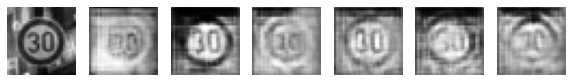

Epoch 2710 g_loss= 0.8661926 d_loss= 1.3764908 real_acc= 0.36 fake_acc= 0.68
Epoch 2720 g_loss= 0.80841905 d_loss= 1.3058094 real_acc= 0.46 fake_acc= 0.74
Epoch 2730 g_loss= 0.85101473 d_loss= 1.2808051 real_acc= 0.4 fake_acc= 0.84
Epoch 2740 g_loss= 0.73883027 d_loss= 1.4115112 real_acc= 0.52 fake_acc= 0.64
Epoch 2750 g_loss= 0.7333606 d_loss= 1.3343127 real_acc= 0.64 fake_acc= 0.64


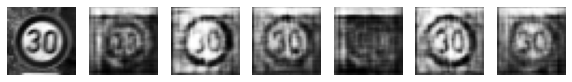

Epoch 2760 g_loss= 0.7526024 d_loss= 1.3605373 real_acc= 0.58 fake_acc= 0.68
Epoch 2770 g_loss= 0.78412634 d_loss= 1.2645599 real_acc= 0.76 fake_acc= 0.64
Epoch 2780 g_loss= 0.7404062 d_loss= 1.264828 real_acc= 0.8 fake_acc= 0.6
Epoch 2790 g_loss= 0.86541146 d_loss= 1.1136781 real_acc= 0.76 fake_acc= 0.72
Epoch 2800 g_loss= 0.9134399 d_loss= 1.1620711 real_acc= 0.74 fake_acc= 0.82


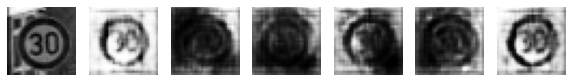

Epoch 2810 g_loss= 0.7732195 d_loss= 1.2873843 real_acc= 0.6 fake_acc= 0.64
Epoch 2820 g_loss= 0.7283699 d_loss= 1.3995674 real_acc= 0.58 fake_acc= 0.6
Epoch 2830 g_loss= 0.64459175 d_loss= 1.4927223 real_acc= 0.62 fake_acc= 0.24
Epoch 2840 g_loss= 0.6891171 d_loss= 1.3533947 real_acc= 0.58 fake_acc= 0.42
Epoch 2850 g_loss= 0.70841813 d_loss= 1.3642778 real_acc= 0.52 fake_acc= 0.6


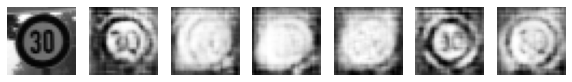

Epoch 2860 g_loss= 0.7642224 d_loss= 1.247649 real_acc= 0.68 fake_acc= 0.76
Epoch 2870 g_loss= 0.899279 d_loss= 1.2023544 real_acc= 0.58 fake_acc= 0.96
Epoch 2880 g_loss= 0.83751386 d_loss= 1.1769576 real_acc= 0.74 fake_acc= 0.86
Epoch 2890 g_loss= 0.7840729 d_loss= 1.2403862 real_acc= 0.6 fake_acc= 0.7
Epoch 2900 g_loss= 0.74398583 d_loss= 1.4105864 real_acc= 0.46 fake_acc= 0.62


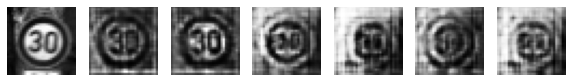

Epoch 2910 g_loss= 0.7330426 d_loss= 1.3415632 real_acc= 0.6 fake_acc= 0.68
Epoch 2920 g_loss= 0.7892482 d_loss= 1.2816819 real_acc= 0.62 fake_acc= 0.74
Epoch 2930 g_loss= 0.8410817 d_loss= 1.1952695 real_acc= 0.66 fake_acc= 0.92
Epoch 2940 g_loss= 0.7562613 d_loss= 1.2344729 real_acc= 0.66 fake_acc= 0.72
Epoch 2950 g_loss= 0.81753266 d_loss= 1.2631522 real_acc= 0.66 fake_acc= 0.74


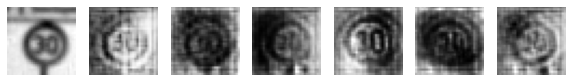

Epoch 2960 g_loss= 0.9753544 d_loss= 1.2061837 real_acc= 0.62 fake_acc= 0.88
Epoch 2970 g_loss= 0.75336367 d_loss= 1.2648351 real_acc= 0.66 fake_acc= 0.58
Epoch 2980 g_loss= 0.70084864 d_loss= 1.4910026 real_acc= 0.5 fake_acc= 0.38
Epoch 2990 g_loss= 0.68226343 d_loss= 1.5091612 real_acc= 0.52 fake_acc= 0.38
Epoch 3000 g_loss= 0.7406861 d_loss= 1.3750552 real_acc= 0.62 fake_acc= 0.58


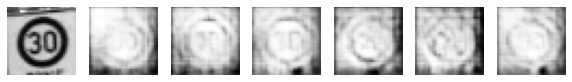

Epoch 3010 g_loss= 0.71946496 d_loss= 1.333153 real_acc= 0.7 fake_acc= 0.52
Epoch 3020 g_loss= 0.7743343 d_loss= 1.2616527 real_acc= 0.7 fake_acc= 0.76
Epoch 3030 g_loss= 0.6660933 d_loss= 1.3619206 real_acc= 0.78 fake_acc= 0.48
Epoch 3040 g_loss= 0.70800215 d_loss= 1.4541588 real_acc= 0.44 fake_acc= 0.56
Epoch 3050 g_loss= 0.7288515 d_loss= 1.4328277 real_acc= 0.4 fake_acc= 0.5


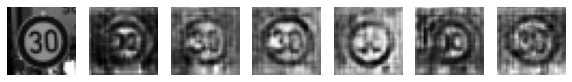

Epoch 3060 g_loss= 0.71231765 d_loss= 1.3071761 real_acc= 0.68 fake_acc= 0.52
Epoch 3070 g_loss= 0.7731135 d_loss= 1.3487871 real_acc= 0.44 fake_acc= 0.74
Epoch 3080 g_loss= 0.7258568 d_loss= 1.3588507 real_acc= 0.44 fake_acc= 0.64
Epoch 3090 g_loss= 0.76702225 d_loss= 1.4231229 real_acc= 0.32 fake_acc= 0.78
Epoch 3100 g_loss= 0.8020907 d_loss= 1.3125803 real_acc= 0.58 fake_acc= 0.76


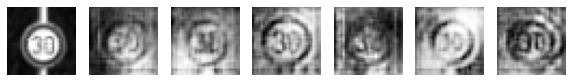

Epoch 3110 g_loss= 0.7508763 d_loss= 1.3292077 real_acc= 0.56 fake_acc= 0.54
Epoch 3120 g_loss= 0.78611356 d_loss= 1.2792046 real_acc= 0.68 fake_acc= 0.66
Epoch 3130 g_loss= 0.78946805 d_loss= 1.3779148 real_acc= 0.46 fake_acc= 0.72
Epoch 3140 g_loss= 0.782475 d_loss= 1.3813436 real_acc= 0.36 fake_acc= 0.82
Epoch 3150 g_loss= 0.6856704 d_loss= 1.4156413 real_acc= 0.52 fake_acc= 0.42


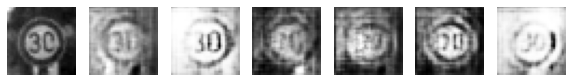

Epoch 3160 g_loss= 0.6726139 d_loss= 1.4246815 real_acc= 0.5 fake_acc= 0.36
Epoch 3170 g_loss= 0.7178329 d_loss= 1.3780465 real_acc= 0.54 fake_acc= 0.58
Epoch 3180 g_loss= 0.76427126 d_loss= 1.3029628 real_acc= 0.58 fake_acc= 0.78
Epoch 3190 g_loss= 0.72310716 d_loss= 1.3551108 real_acc= 0.52 fake_acc= 0.64
Epoch 3200 g_loss= 0.6778398 d_loss= 1.336824 real_acc= 0.68 fake_acc= 0.44


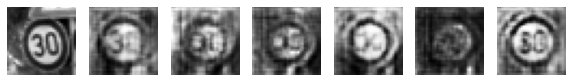

Epoch 3210 g_loss= 0.6690497 d_loss= 1.3650777 real_acc= 0.7 fake_acc= 0.46
Epoch 3220 g_loss= 0.64845157 d_loss= 1.4496814 real_acc= 0.5 fake_acc= 0.26
Epoch 3230 g_loss= 0.6488675 d_loss= 1.4094949 real_acc= 0.6 fake_acc= 0.3
Epoch 3240 g_loss= 0.7327886 d_loss= 1.3500133 real_acc= 0.48 fake_acc= 0.68
Epoch 3250 g_loss= 0.7207715 d_loss= 1.309536 real_acc= 0.52 fake_acc= 0.62


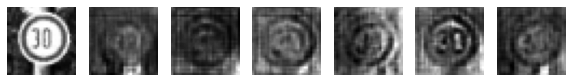

Epoch 3260 g_loss= 0.74193466 d_loss= 1.318137 real_acc= 0.54 fake_acc= 0.72
Epoch 3270 g_loss= 0.75661397 d_loss= 1.3696375 real_acc= 0.52 fake_acc= 0.68
Epoch 3280 g_loss= 0.71801656 d_loss= 1.4630315 real_acc= 0.4 fake_acc= 0.6
Epoch 3290 g_loss= 0.7543671 d_loss= 1.3862485 real_acc= 0.36 fake_acc= 0.64
Epoch 3300 g_loss= 0.7851213 d_loss= 1.3061532 real_acc= 0.5 fake_acc= 0.74


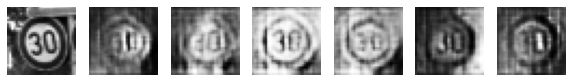

Epoch 3310 g_loss= 0.8329471 d_loss= 1.2730932 real_acc= 0.36 fake_acc= 0.84
Epoch 3320 g_loss= 0.77977365 d_loss= 1.3230698 real_acc= 0.5 fake_acc= 0.72
Epoch 3330 g_loss= 0.7450586 d_loss= 1.4066961 real_acc= 0.36 fake_acc= 0.64
Epoch 3340 g_loss= 0.68644327 d_loss= 1.4621453 real_acc= 0.52 fake_acc= 0.44
Epoch 3350 g_loss= 0.7675915 d_loss= 1.3351915 real_acc= 0.6 fake_acc= 0.78


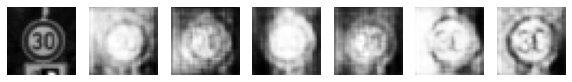

Epoch 3360 g_loss= 0.72390413 d_loss= 1.2859023 real_acc= 0.78 fake_acc= 0.64
Epoch 3370 g_loss= 0.7544583 d_loss= 1.2753346 real_acc= 0.68 fake_acc= 0.7
Epoch 3380 g_loss= 0.7655179 d_loss= 1.3378673 real_acc= 0.58 fake_acc= 0.74
Epoch 3390 g_loss= 0.65489596 d_loss= 1.4050691 real_acc= 0.64 fake_acc= 0.34
Epoch 3400 g_loss= 0.6502257 d_loss= 1.443227 real_acc= 0.6 fake_acc= 0.24


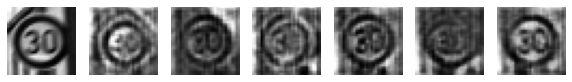

Epoch 3410 g_loss= 0.69213545 d_loss= 1.366859 real_acc= 0.58 fake_acc= 0.4
Epoch 3420 g_loss= 0.68513054 d_loss= 1.2820324 real_acc= 0.78 fake_acc= 0.44
Epoch 3430 g_loss= 0.7906431 d_loss= 1.3537409 real_acc= 0.4 fake_acc= 0.88
Epoch 3440 g_loss= 0.7406421 d_loss= 1.3041499 real_acc= 0.56 fake_acc= 0.72
Epoch 3450 g_loss= 0.7432473 d_loss= 1.2964144 real_acc= 0.56 fake_acc= 0.74


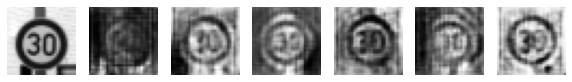

Epoch 3460 g_loss= 0.8318849 d_loss= 1.2921627 real_acc= 0.52 fake_acc= 0.86
Epoch 3470 g_loss= 0.74869764 d_loss= 1.2786646 real_acc= 0.6 fake_acc= 0.64
Epoch 3480 g_loss= 0.73601186 d_loss= 1.3723583 real_acc= 0.54 fake_acc= 0.58
Epoch 3490 g_loss= 0.7295311 d_loss= 1.5355955 real_acc= 0.26 fake_acc= 0.54
Epoch 3500 g_loss= 0.6849908 d_loss= 1.4251361 real_acc= 0.56 fake_acc= 0.44


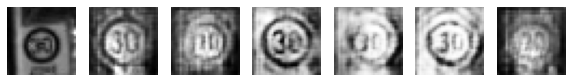

Epoch 3510 g_loss= 0.73118067 d_loss= 1.4077522 real_acc= 0.42 fake_acc= 0.58
Epoch 3520 g_loss= 0.78479356 d_loss= 1.3550725 real_acc= 0.34 fake_acc= 0.86
Epoch 3530 g_loss= 0.78949267 d_loss= 1.2691249 real_acc= 0.7 fake_acc= 0.82
Epoch 3540 g_loss= 0.7535011 d_loss= 1.2721612 real_acc= 0.74 fake_acc= 0.66
Epoch 3550 g_loss= 0.6834369 d_loss= 1.3998449 real_acc= 0.72 fake_acc= 0.44


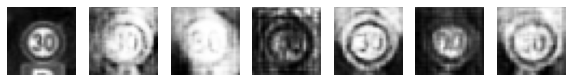

Epoch 3560 g_loss= 0.67491156 d_loss= 1.4058609 real_acc= 0.58 fake_acc= 0.48
Epoch 3570 g_loss= 0.67378354 d_loss= 1.3901739 real_acc= 0.66 fake_acc= 0.34
Epoch 3580 g_loss= 0.73631996 d_loss= 1.3684207 real_acc= 0.5 fake_acc= 0.38
Epoch 3590 g_loss= 0.70260984 d_loss= 1.3280132 real_acc= 0.8 fake_acc= 0.32
Epoch 3600 g_loss= 0.7170985 d_loss= 1.3284253 real_acc= 0.62 fake_acc= 0.64


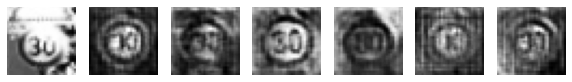

Epoch 3610 g_loss= 0.7388974 d_loss= 1.2864524 real_acc= 0.7 fake_acc= 0.8
Epoch 3620 g_loss= 0.70747375 d_loss= 1.3532257 real_acc= 0.6 fake_acc= 0.6
Epoch 3630 g_loss= 0.6522996 d_loss= 1.3876593 real_acc= 0.6 fake_acc= 0.46
Epoch 3640 g_loss= 0.72639436 d_loss= 1.3504725 real_acc= 0.54 fake_acc= 0.62
Epoch 3650 g_loss= 0.76736087 d_loss= 1.2278459 real_acc= 0.58 fake_acc= 0.7


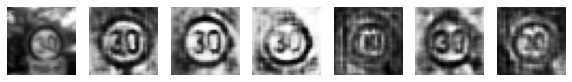

Epoch 3660 g_loss= 0.78027457 d_loss= 1.2773886 real_acc= 0.52 fake_acc= 0.74
Epoch 3670 g_loss= 0.75634193 d_loss= 1.352318 real_acc= 0.44 fake_acc= 0.72
Epoch 3680 g_loss= 0.7282554 d_loss= 1.4349484 real_acc= 0.48 fake_acc= 0.68
Epoch 3690 g_loss= 0.7024894 d_loss= 1.433835 real_acc= 0.58 fake_acc= 0.46
Epoch 3700 g_loss= 0.6453081 d_loss= 1.45766 real_acc= 0.54 fake_acc= 0.36


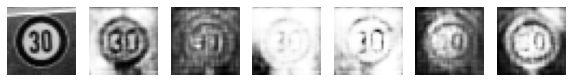

Epoch 3710 g_loss= 0.73825616 d_loss= 1.3729177 real_acc= 0.58 fake_acc= 0.42
Epoch 3720 g_loss= 0.79920614 d_loss= 1.3220735 real_acc= 0.54 fake_acc= 0.62
Epoch 3730 g_loss= 0.7068168 d_loss= 1.3152361 real_acc= 0.76 fake_acc= 0.48
Epoch 3740 g_loss= 0.7249674 d_loss= 1.3844608 real_acc= 0.6 fake_acc= 0.5
Epoch 3750 g_loss= 0.72709304 d_loss= 1.3193883 real_acc= 0.66 fake_acc= 0.52


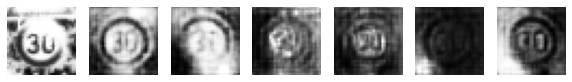

Epoch 3760 g_loss= 0.7001906 d_loss= 1.3039638 real_acc= 0.78 fake_acc= 0.44
Epoch 3770 g_loss= 0.74194276 d_loss= 1.3267372 real_acc= 0.54 fake_acc= 0.78
Epoch 3780 g_loss= 0.70252764 d_loss= 1.3179808 real_acc= 0.68 fake_acc= 0.5
Epoch 3790 g_loss= 0.7634787 d_loss= 1.3253769 real_acc= 0.48 fake_acc= 0.78
Epoch 3800 g_loss= 0.72592527 d_loss= 1.3120763 real_acc= 0.62 fake_acc= 0.64


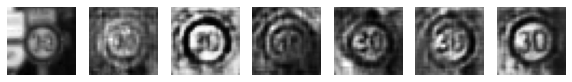

Epoch 3810 g_loss= 0.7171241 d_loss= 1.284595 real_acc= 0.68 fake_acc= 0.64
Epoch 3820 g_loss= 0.7432681 d_loss= 1.3232639 real_acc= 0.38 fake_acc= 0.68
Epoch 3830 g_loss= 0.7847545 d_loss= 1.3581593 real_acc= 0.32 fake_acc= 0.84
Epoch 3840 g_loss= 0.8073663 d_loss= 1.3670708 real_acc= 0.28 fake_acc= 0.84
Epoch 3850 g_loss= 0.7045079 d_loss= 1.4598509 real_acc= 0.28 fake_acc= 0.56


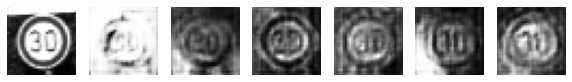

Epoch 3860 g_loss= 0.7160159 d_loss= 1.3739406 real_acc= 0.6 fake_acc= 0.54
Epoch 3870 g_loss= 0.7293584 d_loss= 1.3250666 real_acc= 0.7 fake_acc= 0.5
Epoch 3880 g_loss= 0.69775045 d_loss= 1.3974391 real_acc= 0.64 fake_acc= 0.34
Epoch 3890 g_loss= 0.7367087 d_loss= 1.2968986 real_acc= 0.7 fake_acc= 0.44
Epoch 3900 g_loss= 0.6789821 d_loss= 1.3335854 real_acc= 0.7 fake_acc= 0.54


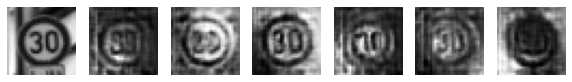

Epoch 3910 g_loss= 0.70553255 d_loss= 1.4400222 real_acc= 0.42 fake_acc= 0.54
Epoch 3920 g_loss= 0.69230956 d_loss= 1.3738058 real_acc= 0.56 fake_acc= 0.56
Epoch 3930 g_loss= 0.7041841 d_loss= 1.3159564 real_acc= 0.64 fake_acc= 0.54
Epoch 3940 g_loss= 0.802753 d_loss= 1.292805 real_acc= 0.44 fake_acc= 0.8
Epoch 3950 g_loss= 0.75578797 d_loss= 1.3061585 real_acc= 0.52 fake_acc= 0.74


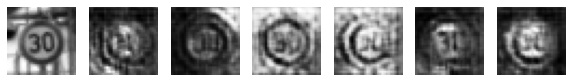

Epoch 3960 g_loss= 0.7918692 d_loss= 1.3219864 real_acc= 0.5 fake_acc= 0.76
Epoch 3970 g_loss= 0.73556566 d_loss= 1.3875117 real_acc= 0.5 fake_acc= 0.64
Epoch 3980 g_loss= 0.65464735 d_loss= 1.4252908 real_acc= 0.52 fake_acc= 0.32
Epoch 3990 g_loss= 0.6837948 d_loss= 1.4486432 real_acc= 0.52 fake_acc= 0.36
Epoch 4000 g_loss= 0.6850741 d_loss= 1.3955971 real_acc= 0.56 fake_acc= 0.32


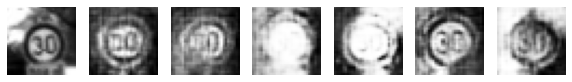

Epoch 4010 g_loss= 0.72238487 d_loss= 1.3985283 real_acc= 0.34 fake_acc= 0.42
Epoch 4020 g_loss= 0.7298483 d_loss= 1.3381269 real_acc= 0.68 fake_acc= 0.58
Epoch 4030 g_loss= 0.7388131 d_loss= 1.3157792 real_acc= 0.62 fake_acc= 0.66
Epoch 4040 g_loss= 0.7617368 d_loss= 1.3083031 real_acc= 0.64 fake_acc= 0.8
Epoch 4050 g_loss= 0.69766754 d_loss= 1.3401737 real_acc= 0.68 fake_acc= 0.52


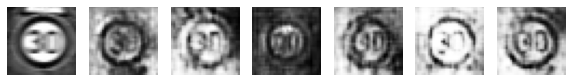

Epoch 4060 g_loss= 0.7420253 d_loss= 1.3560047 real_acc= 0.4 fake_acc= 0.82
Epoch 4070 g_loss= 0.696982 d_loss= 1.3205168 real_acc= 0.76 fake_acc= 0.56
Epoch 4080 g_loss= 0.72986966 d_loss= 1.325758 real_acc= 0.56 fake_acc= 0.66
Epoch 4090 g_loss= 0.7073048 d_loss= 1.3424307 real_acc= 0.56 fake_acc= 0.58
Epoch 4100 g_loss= 0.73866045 d_loss= 1.3052022 real_acc= 0.6 fake_acc= 0.76


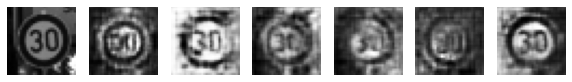

Epoch 4110 g_loss= 0.73350465 d_loss= 1.3332729 real_acc= 0.5 fake_acc= 0.66
Epoch 4120 g_loss= 0.6947932 d_loss= 1.35096 real_acc= 0.42 fake_acc= 0.62
Epoch 4130 g_loss= 0.71309817 d_loss= 1.3771436 real_acc= 0.38 fake_acc= 0.58
Epoch 4140 g_loss= 0.72683245 d_loss= 1.4164917 real_acc= 0.34 fake_acc= 0.64
Epoch 4150 g_loss= 0.759754 d_loss= 1.3895738 real_acc= 0.26 fake_acc= 0.66


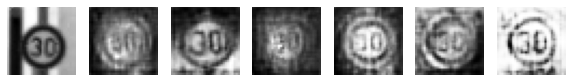

Epoch 4160 g_loss= 0.8109035 d_loss= 1.3365216 real_acc= 0.42 fake_acc= 0.74
Epoch 4170 g_loss= 0.7625569 d_loss= 1.3330476 real_acc= 0.62 fake_acc= 0.56
Epoch 4180 g_loss= 0.7443325 d_loss= 1.3019761 real_acc= 0.7 fake_acc= 0.56
Epoch 4190 g_loss= 0.7584923 d_loss= 1.2772002 real_acc= 0.82 fake_acc= 0.5
Epoch 4200 g_loss= 0.7406711 d_loss= 1.3185672 real_acc= 0.7 fake_acc= 0.48


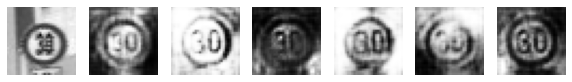

Epoch 4210 g_loss= 0.7050972 d_loss= 1.391096 real_acc= 0.56 fake_acc= 0.54
Epoch 4220 g_loss= 0.6923175 d_loss= 1.387158 real_acc= 0.62 fake_acc= 0.42
Epoch 4230 g_loss= 0.69871664 d_loss= 1.3873888 real_acc= 0.48 fake_acc= 0.48
Epoch 4240 g_loss= 0.63734406 d_loss= 1.4082452 real_acc= 0.62 fake_acc= 0.26
Epoch 4250 g_loss= 0.73501724 d_loss= 1.3366556 real_acc= 0.58 fake_acc= 0.66


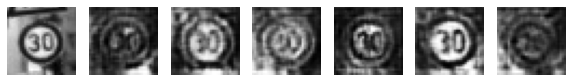

Epoch 4260 g_loss= 0.7532687 d_loss= 1.2705915 real_acc= 0.78 fake_acc= 0.74
Epoch 4270 g_loss= 0.77039933 d_loss= 1.2809352 real_acc= 0.54 fake_acc= 0.86
Epoch 4280 g_loss= 0.7646468 d_loss= 1.3047279 real_acc= 0.42 fake_acc= 0.78
Epoch 4290 g_loss= 0.7387387 d_loss= 1.3844866 real_acc= 0.4 fake_acc= 0.78
Epoch 4300 g_loss= 0.757172 d_loss= 1.391502 real_acc= 0.52 fake_acc= 0.58


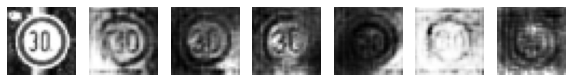

Epoch 4310 g_loss= 0.7726904 d_loss= 1.3500938 real_acc= 0.54 fake_acc= 0.6
Epoch 4320 g_loss= 0.7492979 d_loss= 1.3369255 real_acc= 0.6 fake_acc= 0.6
Epoch 4330 g_loss= 0.8026354 d_loss= 1.3065039 real_acc= 0.64 fake_acc= 0.82
Epoch 4340 g_loss= 0.66696084 d_loss= 1.414834 real_acc= 0.66 fake_acc= 0.5
Epoch 4350 g_loss= 0.6580273 d_loss= 1.3593429 real_acc= 0.68 fake_acc= 0.48


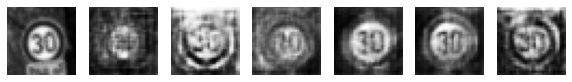

Epoch 4360 g_loss= 0.7328551 d_loss= 1.4188875 real_acc= 0.34 fake_acc= 0.68
Epoch 4370 g_loss= 0.7428901 d_loss= 1.3806344 real_acc= 0.28 fake_acc= 0.66
Epoch 4380 g_loss= 0.7704909 d_loss= 1.2782156 real_acc= 0.62 fake_acc= 0.72
Epoch 4390 g_loss= 0.75715315 d_loss= 1.257937 real_acc= 0.8 fake_acc= 0.66
Epoch 4400 g_loss= 0.82484555 d_loss= 1.2016554 real_acc= 0.74 fake_acc= 0.86


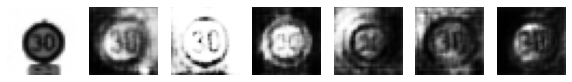

Epoch 4410 g_loss= 0.87170744 d_loss= 1.2366846 real_acc= 0.64 fake_acc= 0.84
Epoch 4420 g_loss= 0.7799163 d_loss= 1.2739992 real_acc= 0.7 fake_acc= 0.72
Epoch 4430 g_loss= 0.74373925 d_loss= 1.3212204 real_acc= 0.68 fake_acc= 0.62
Epoch 4440 g_loss= 0.7152488 d_loss= 1.382649 real_acc= 0.5 fake_acc= 0.42
Epoch 4450 g_loss= 0.7358823 d_loss= 1.4566792 real_acc= 0.4 fake_acc= 0.52


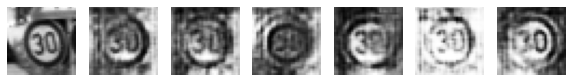

Epoch 4460 g_loss= 0.8019971 d_loss= 1.4085072 real_acc= 0.3 fake_acc= 0.78
Epoch 4470 g_loss= 0.7204453 d_loss= 1.4320748 real_acc= 0.5 fake_acc= 0.62
Epoch 4480 g_loss= 0.68177086 d_loss= 1.4173946 real_acc= 0.44 fake_acc= 0.52
Epoch 4490 g_loss= 0.68395233 d_loss= 1.385191 real_acc= 0.54 fake_acc= 0.52
Epoch 4500 g_loss= 0.72579527 d_loss= 1.3265536 real_acc= 0.48 fake_acc= 0.66


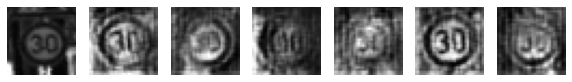

Epoch 4510 g_loss= 0.8239928 d_loss= 1.3293456 real_acc= 0.26 fake_acc= 0.82
Epoch 4520 g_loss= 0.78008455 d_loss= 1.3537507 real_acc= 0.3 fake_acc= 0.76
Epoch 4530 g_loss= 0.785444 d_loss= 1.3327453 real_acc= 0.4 fake_acc= 0.78
Epoch 4540 g_loss= 0.79760766 d_loss= 1.3625877 real_acc= 0.3 fake_acc= 0.76
Epoch 4550 g_loss= 0.69587016 d_loss= 1.327955 real_acc= 0.86 fake_acc= 0.42


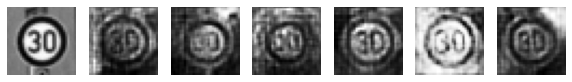

Epoch 4560 g_loss= 0.6762166 d_loss= 1.3952627 real_acc= 0.62 fake_acc= 0.36
Epoch 4570 g_loss= 0.6478951 d_loss= 1.4436843 real_acc= 0.5 fake_acc= 0.28
Epoch 4580 g_loss= 0.6893171 d_loss= 1.3964257 real_acc= 0.6 fake_acc= 0.52
Epoch 4590 g_loss= 0.6844586 d_loss= 1.3621619 real_acc= 0.72 fake_acc= 0.36
Epoch 4600 g_loss= 0.7149475 d_loss= 1.3266118 real_acc= 0.78 fake_acc= 0.56


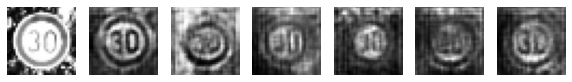

Epoch 4610 g_loss= 0.7170631 d_loss= 1.3181982 real_acc= 0.66 fake_acc= 0.56
Epoch 4620 g_loss= 0.73912585 d_loss= 1.2884715 real_acc= 0.7 fake_acc= 0.8
Epoch 4630 g_loss= 0.7109385 d_loss= 1.3266456 real_acc= 0.66 fake_acc= 0.6
Epoch 4640 g_loss= 0.7265102 d_loss= 1.3583686 real_acc= 0.54 fake_acc= 0.62
Epoch 4650 g_loss= 0.6870172 d_loss= 1.3634033 real_acc= 0.62 fake_acc= 0.4


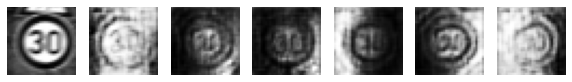

Epoch 4660 g_loss= 0.67970854 d_loss= 1.3627948 real_acc= 0.8 fake_acc= 0.36
Epoch 4670 g_loss= 0.72225136 d_loss= 1.3429618 real_acc= 0.68 fake_acc= 0.62
Epoch 4680 g_loss= 0.70937884 d_loss= 1.3523743 real_acc= 0.64 fake_acc= 0.48
Epoch 4690 g_loss= 0.6875948 d_loss= 1.3876793 real_acc= 0.64 fake_acc= 0.36
Epoch 4700 g_loss= 0.69959944 d_loss= 1.4071649 real_acc= 0.48 fake_acc= 0.6


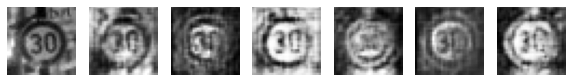

Epoch 4710 g_loss= 0.6703164 d_loss= 1.3891494 real_acc= 0.62 fake_acc= 0.42
Epoch 4720 g_loss= 0.7504013 d_loss= 1.3581547 real_acc= 0.4 fake_acc= 0.74
Epoch 4730 g_loss= 0.71680224 d_loss= 1.3603309 real_acc= 0.46 fake_acc= 0.68
Epoch 4740 g_loss= 0.75585526 d_loss= 1.3329852 real_acc= 0.4 fake_acc= 0.76
Epoch 4750 g_loss= 0.7319357 d_loss= 1.3923538 real_acc= 0.38 fake_acc= 0.7


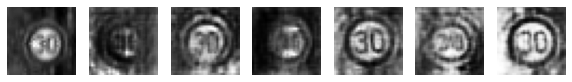

Epoch 4760 g_loss= 0.74686354 d_loss= 1.3610975 real_acc= 0.58 fake_acc= 0.58
Epoch 4770 g_loss= 0.6858423 d_loss= 1.3682377 real_acc= 0.72 fake_acc= 0.36
Epoch 4780 g_loss= 0.7015553 d_loss= 1.4185019 real_acc= 0.58 fake_acc= 0.38
Epoch 4790 g_loss= 0.73404074 d_loss= 1.3556828 real_acc= 0.5 fake_acc= 0.6
Epoch 4800 g_loss= 0.6766101 d_loss= 1.4176981 real_acc= 0.56 fake_acc= 0.42


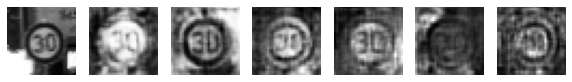

Epoch 4810 g_loss= 0.70727897 d_loss= 1.421546 real_acc= 0.4 fake_acc= 0.6
Epoch 4820 g_loss= 0.68450457 d_loss= 1.4115602 real_acc= 0.46 fake_acc= 0.54
Epoch 4830 g_loss= 0.7129247 d_loss= 1.3707447 real_acc= 0.42 fake_acc= 0.64
Epoch 4840 g_loss= 0.7903694 d_loss= 1.3623438 real_acc= 0.22 fake_acc= 0.84
Epoch 4850 g_loss= 0.74997604 d_loss= 1.3525202 real_acc= 0.36 fake_acc= 0.8


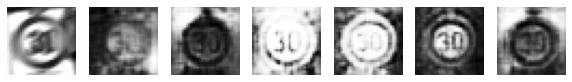

Epoch 4860 g_loss= 0.70162165 d_loss= 1.36775 real_acc= 0.62 fake_acc= 0.6
Epoch 4870 g_loss= 0.6992314 d_loss= 1.3937504 real_acc= 0.56 fake_acc= 0.5
Epoch 4880 g_loss= 0.67188036 d_loss= 1.398346 real_acc= 0.6 fake_acc= 0.36
Epoch 4890 g_loss= 0.6794038 d_loss= 1.3362794 real_acc= 0.8 fake_acc= 0.32
Epoch 4900 g_loss= 0.692961 d_loss= 1.4013658 real_acc= 0.58 fake_acc= 0.42


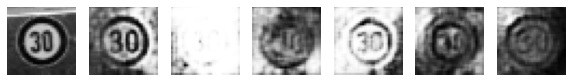

Epoch 4910 g_loss= 0.6629868 d_loss= 1.4005113 real_acc= 0.52 fake_acc= 0.36
Epoch 4920 g_loss= 0.72481066 d_loss= 1.3897035 real_acc= 0.46 fake_acc= 0.68
Epoch 4930 g_loss= 0.6819098 d_loss= 1.3749822 real_acc= 0.54 fake_acc= 0.46
Epoch 4940 g_loss= 0.6900352 d_loss= 1.347476 real_acc= 0.68 fake_acc= 0.54
Epoch 4950 g_loss= 0.7140088 d_loss= 1.3460608 real_acc= 0.52 fake_acc= 0.62


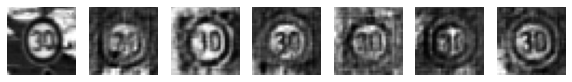

Epoch 4960 g_loss= 0.7407032 d_loss= 1.3279848 real_acc= 0.5 fake_acc= 0.66
Epoch 4970 g_loss= 0.7655232 d_loss= 1.3693233 real_acc= 0.22 fake_acc= 0.82
Epoch 4980 g_loss= 0.757984 d_loss= 1.3255217 real_acc= 0.6 fake_acc= 0.8
Epoch 4990 g_loss= 0.74448806 d_loss= 1.3260412 real_acc= 0.64 fake_acc= 0.66
Epoch 5000 g_loss= 0.71947235 d_loss= 1.3678358 real_acc= 0.62 fake_acc= 0.44


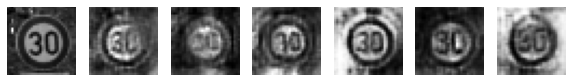

Epoch 5010 g_loss= 0.7161773 d_loss= 1.3593488 real_acc= 0.6 fake_acc= 0.5
Epoch 5020 g_loss= 0.71997637 d_loss= 1.4240882 real_acc= 0.5 fake_acc= 0.5
Epoch 5030 g_loss= 0.699685 d_loss= 1.4036614 real_acc= 0.64 fake_acc= 0.54
Epoch 5040 g_loss= 0.65863425 d_loss= 1.4155076 real_acc= 0.72 fake_acc= 0.36
Epoch 5050 g_loss= 0.70691055 d_loss= 1.3795817 real_acc= 0.62 fake_acc= 0.48


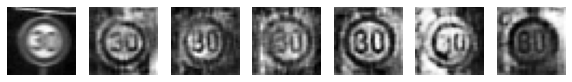

Epoch 5060 g_loss= 0.7996028 d_loss= 1.2762752 real_acc= 0.5 fake_acc= 0.9
Epoch 5070 g_loss= 0.80989146 d_loss= 1.3494945 real_acc= 0.24 fake_acc= 0.84
Epoch 5080 g_loss= 0.7164374 d_loss= 1.4331441 real_acc= 0.38 fake_acc= 0.54
Epoch 5090 g_loss= 0.7240595 d_loss= 1.4129444 real_acc= 0.48 fake_acc= 0.44
Epoch 5100 g_loss= 0.6803953 d_loss= 1.3308759 real_acc= 0.84 fake_acc= 0.32


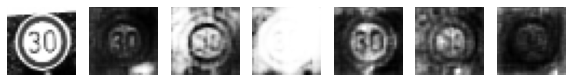

Epoch 5110 g_loss= 0.74902475 d_loss= 1.3061733 real_acc= 0.82 fake_acc= 0.36
Epoch 5120 g_loss= 0.70886576 d_loss= 1.3150713 real_acc= 0.76 fake_acc= 0.42
Epoch 5130 g_loss= 0.694006 d_loss= 1.357386 real_acc= 0.62 fake_acc= 0.5
Epoch 5140 g_loss= 0.69941056 d_loss= 1.4805589 real_acc= 0.38 fake_acc= 0.58
Epoch 5150 g_loss= 0.6467925 d_loss= 1.4416715 real_acc= 0.52 fake_acc= 0.36


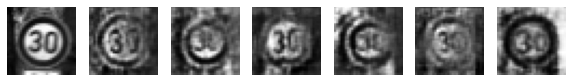

Epoch 5160 g_loss= 0.72231936 d_loss= 1.4199626 real_acc= 0.34 fake_acc= 0.62
Epoch 5170 g_loss= 0.651559 d_loss= 1.4093876 real_acc= 0.64 fake_acc= 0.3
Epoch 5180 g_loss= 0.7559327 d_loss= 1.3355443 real_acc= 0.5 fake_acc= 0.66
Epoch 5190 g_loss= 0.71972245 d_loss= 1.3616767 real_acc= 0.58 fake_acc= 0.56
Epoch 5200 g_loss= 0.7348404 d_loss= 1.3921871 real_acc= 0.4 fake_acc= 0.62


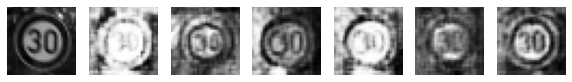

Epoch 5210 g_loss= 0.6921909 d_loss= 1.432486 real_acc= 0.4 fake_acc= 0.46
Epoch 5220 g_loss= 0.7172486 d_loss= 1.4024403 real_acc= 0.42 fake_acc= 0.6
Epoch 5230 g_loss= 0.73695123 d_loss= 1.3755667 real_acc= 0.56 fake_acc= 0.58
Epoch 5240 g_loss= 0.752527 d_loss= 1.3261867 real_acc= 0.56 fake_acc= 0.66
Epoch 5250 g_loss= 0.7637937 d_loss= 1.3221366 real_acc= 0.54 fake_acc= 0.56


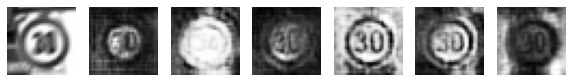

Epoch 5260 g_loss= 0.784254 d_loss= 1.3706946 real_acc= 0.44 fake_acc= 0.74
Epoch 5270 g_loss= 0.7280064 d_loss= 1.3579388 real_acc= 0.52 fake_acc= 0.64
Epoch 5280 g_loss= 0.735961 d_loss= 1.376092 real_acc= 0.5 fake_acc= 0.68
Epoch 5290 g_loss= 0.75990295 d_loss= 1.3016491 real_acc= 0.54 fake_acc= 0.72
Epoch 5300 g_loss= 0.80529267 d_loss= 1.3730311 real_acc= 0.38 fake_acc= 0.76


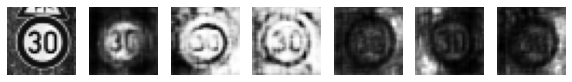

Epoch 5310 g_loss= 0.68783116 d_loss= 1.5027498 real_acc= 0.36 fake_acc= 0.58
Epoch 5320 g_loss= 0.7071318 d_loss= 1.4619272 real_acc= 0.34 fake_acc= 0.6
Epoch 5330 g_loss= 0.7205301 d_loss= 1.3833708 real_acc= 0.62 fake_acc= 0.6
Epoch 5340 g_loss= 0.68218786 d_loss= 1.3158371 real_acc= 0.86 fake_acc= 0.42
Epoch 5350 g_loss= 0.79528624 d_loss= 1.2753794 real_acc= 0.72 fake_acc= 0.66


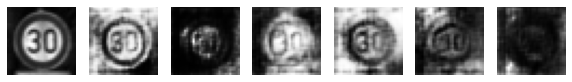

Epoch 5360 g_loss= 0.78283644 d_loss= 1.2133405 real_acc= 0.86 fake_acc= 0.68
Epoch 5370 g_loss= 0.80468214 d_loss= 1.2901602 real_acc= 0.58 fake_acc= 0.66
Epoch 5380 g_loss= 0.77777433 d_loss= 1.3652642 real_acc= 0.48 fake_acc= 0.56
Epoch 5390 g_loss= 0.75532794 d_loss= 1.4477882 real_acc= 0.34 fake_acc= 0.46
Epoch 5400 g_loss= 0.7025495 d_loss= 1.4228498 real_acc= 0.54 fake_acc= 0.52


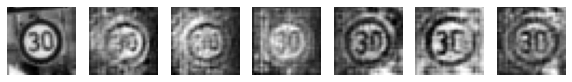

Epoch 5410 g_loss= 0.71687615 d_loss= 1.3760195 real_acc= 0.52 fake_acc= 0.62
Epoch 5420 g_loss= 0.68390024 d_loss= 1.370378 real_acc= 0.66 fake_acc= 0.58
Epoch 5430 g_loss= 0.6959062 d_loss= 1.3628845 real_acc= 0.58 fake_acc= 0.5
Epoch 5440 g_loss= 0.71510667 d_loss= 1.3826625 real_acc= 0.42 fake_acc= 0.58
Epoch 5450 g_loss= 0.7597586 d_loss= 1.3477039 real_acc= 0.46 fake_acc= 0.74


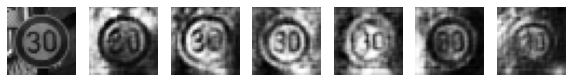

Epoch 5460 g_loss= 0.8279467 d_loss= 1.3663688 real_acc= 0.28 fake_acc= 0.86
Epoch 5470 g_loss= 0.75832796 d_loss= 1.4672515 real_acc= 0.36 fake_acc= 0.56
Epoch 5480 g_loss= 0.6887506 d_loss= 1.4095137 real_acc= 0.62 fake_acc= 0.44
Epoch 5490 g_loss= 0.66795105 d_loss= 1.4122376 real_acc= 0.58 fake_acc= 0.52
Epoch 5500 g_loss= 0.70868284 d_loss= 1.3449146 real_acc= 0.7 fake_acc= 0.52


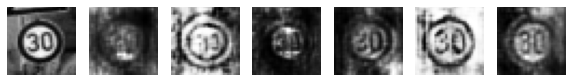

Epoch 5510 g_loss= 0.730591 d_loss= 1.3042729 real_acc= 0.78 fake_acc= 0.72
Epoch 5520 g_loss= 0.7017435 d_loss= 1.3860068 real_acc= 0.44 fake_acc= 0.54
Epoch 5530 g_loss= 0.73567855 d_loss= 1.3999652 real_acc= 0.44 fake_acc= 0.7
Epoch 5540 g_loss= 0.67063195 d_loss= 1.4222412 real_acc= 0.5 fake_acc= 0.38
Epoch 5550 g_loss= 0.7175728 d_loss= 1.4695044 real_acc= 0.4 fake_acc= 0.6


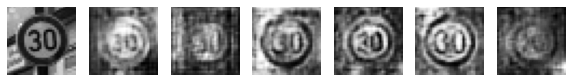

Epoch 5560 g_loss= 0.7083523 d_loss= 1.3931289 real_acc= 0.6 fake_acc= 0.52
Epoch 5570 g_loss= 0.68960345 d_loss= 1.3732953 real_acc= 0.64 fake_acc= 0.5
Epoch 5580 g_loss= 0.6782929 d_loss= 1.3465291 real_acc= 0.76 fake_acc= 0.4
Epoch 5590 g_loss= 0.7505574 d_loss= 1.3576796 real_acc= 0.48 fake_acc= 0.6
Epoch 5600 g_loss= 0.71528304 d_loss= 1.3011949 real_acc= 0.7 fake_acc= 0.6


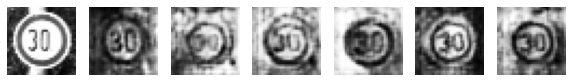

Epoch 5610 g_loss= 0.7731185 d_loss= 1.3681972 real_acc= 0.32 fake_acc= 0.72
Epoch 5620 g_loss= 0.74151695 d_loss= 1.3274462 real_acc= 0.6 fake_acc= 0.68
Epoch 5630 g_loss= 0.72705215 d_loss= 1.3821275 real_acc= 0.54 fake_acc= 0.54
Epoch 5640 g_loss= 0.6511808 d_loss= 1.3597239 real_acc= 0.74 fake_acc= 0.36
Epoch 5650 g_loss= 0.78777146 d_loss= 1.3198507 real_acc= 0.62 fake_acc= 0.58


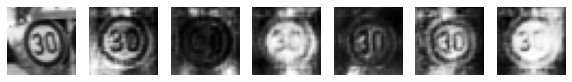

Epoch 5660 g_loss= 0.7552919 d_loss= 1.3490425 real_acc= 0.64 fake_acc= 0.54
Epoch 5670 g_loss= 0.68947566 d_loss= 1.3272427 real_acc= 0.78 fake_acc= 0.44
Epoch 5680 g_loss= 0.74224424 d_loss= 1.312482 real_acc= 0.64 fake_acc= 0.66
Epoch 5690 g_loss= 0.7149615 d_loss= 1.380698 real_acc= 0.56 fake_acc= 0.58
Epoch 5700 g_loss= 0.6948482 d_loss= 1.4234835 real_acc= 0.42 fake_acc= 0.6


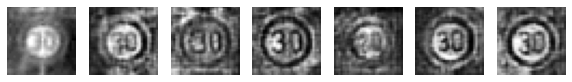

Epoch 5710 g_loss= 0.7069783 d_loss= 1.4377898 real_acc= 0.36 fake_acc= 0.52
Epoch 5720 g_loss= 0.7171397 d_loss= 1.396507 real_acc= 0.32 fake_acc= 0.58
Epoch 5730 g_loss= 0.7557171 d_loss= 1.334399 real_acc= 0.38 fake_acc= 0.72
Epoch 5740 g_loss= 0.78913 d_loss= 1.3299911 real_acc= 0.42 fake_acc= 0.88
Epoch 5750 g_loss= 0.777454 d_loss= 1.3761407 real_acc= 0.28 fake_acc= 0.64


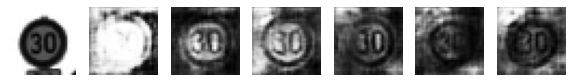

Epoch 5760 g_loss= 0.7267737 d_loss= 1.3134978 real_acc= 0.74 fake_acc= 0.48
Epoch 5770 g_loss= 0.7159238 d_loss= 1.3091438 real_acc= 0.82 fake_acc= 0.46
Epoch 5780 g_loss= 0.7334343 d_loss= 1.349802 real_acc= 0.72 fake_acc= 0.44
Epoch 5790 g_loss= 0.7635004 d_loss= 1.3075023 real_acc= 0.66 fake_acc= 0.5
Epoch 5800 g_loss= 0.70921016 d_loss= 1.3759496 real_acc= 0.68 fake_acc= 0.56


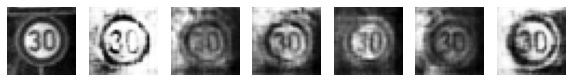

Epoch 5810 g_loss= 0.6601837 d_loss= 1.4793665 real_acc= 0.46 fake_acc= 0.38
Epoch 5820 g_loss= 0.70076835 d_loss= 1.3739989 real_acc= 0.56 fake_acc= 0.54
Epoch 5830 g_loss= 0.6777202 d_loss= 1.3877982 real_acc= 0.62 fake_acc= 0.44
Epoch 5840 g_loss= 0.7779949 d_loss= 1.307319 real_acc= 0.58 fake_acc= 0.82
Epoch 5850 g_loss= 0.7814357 d_loss= 1.3176119 real_acc= 0.5 fake_acc= 0.7


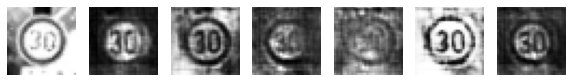

Epoch 5860 g_loss= 0.8099717 d_loss= 1.3151519 real_acc= 0.4 fake_acc= 0.82
Epoch 5870 g_loss= 0.7637326 d_loss= 1.3679943 real_acc= 0.58 fake_acc= 0.64
Epoch 5880 g_loss= 0.74771 d_loss= 1.316252 real_acc= 0.7 fake_acc= 0.48
Epoch 5890 g_loss= 0.7439802 d_loss= 1.3152703 real_acc= 0.78 fake_acc= 0.42
Epoch 5900 g_loss= 0.7137912 d_loss= 1.3667303 real_acc= 0.66 fake_acc= 0.36


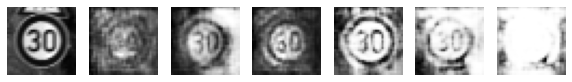

Epoch 5910 g_loss= 0.712526 d_loss= 1.5327301 real_acc= 0.44 fake_acc= 0.54
Epoch 5920 g_loss= 0.72245497 d_loss= 1.3890746 real_acc= 0.58 fake_acc= 0.68
Epoch 5930 g_loss= 0.68532753 d_loss= 1.4004028 real_acc= 0.56 fake_acc= 0.48
Epoch 5940 g_loss= 0.6933065 d_loss= 1.3035035 real_acc= 0.84 fake_acc= 0.42
Epoch 5950 g_loss= 0.7910394 d_loss= 1.2922164 real_acc= 0.56 fake_acc= 0.66


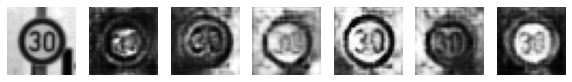

Epoch 5960 g_loss= 0.76332974 d_loss= 1.3406441 real_acc= 0.56 fake_acc= 0.68
Epoch 5970 g_loss= 0.71044004 d_loss= 1.4049757 real_acc= 0.54 fake_acc= 0.62
Epoch 5980 g_loss= 0.6587465 d_loss= 1.3595138 real_acc= 0.74 fake_acc= 0.5
Epoch 5990 g_loss= 0.72113496 d_loss= 1.306546 real_acc= 0.72 fake_acc= 0.48
Done


In [14]:
epochs = 6000
for epoch in range(epochs):
    # take some random samples
    new_samples = sample_from_dataset(50,samples)
    # perform one training step (epoch)
    do_step(new_samples)
    
    if epoch % 50 == 0:
        # show one real image and some fake images generated by generator using noise seed
        #display.clear_output(wait=True)
        num_examples_to_generate = 6
        seed = tf.random.normal([num_examples_to_generate, noise_dim])
        predictions = generator(seed, training=False)
        fig = plt.figure(figsize=(10,10))
        r = random.randrange(len(samples))
        plt.subplot(1, num_examples_to_generate+1, 1)
        plt.imshow(samples[r, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
        for i in range(predictions.shape[0]):
            plt.subplot(1, num_examples_to_generate+1, i+2)
            #plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
            plt.imshow(predictions[i, :, :, 0], cmap='gray')
            plt.axis('off')
        plt.show()    
print("Done")

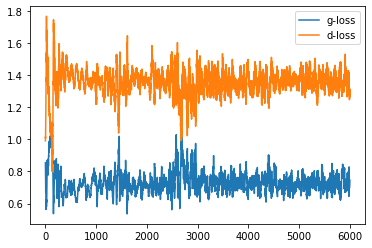

In [15]:
nph = np.array(history)

plt.plot(nph[:,0], label='g-loss')
plt.plot(nph[:,1], label='d-loss')
plt.legend()
plt.show()

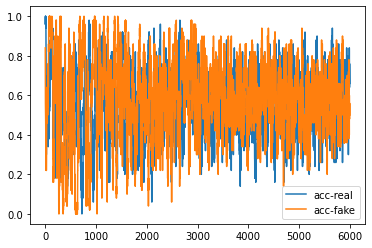

In [16]:
nph = np.array(history)

plt.plot(nph[:,2], label='acc-real')
plt.plot(nph[:,3], label='acc-fake')
plt.legend()
plt.show()

In [19]:
generator.save_weights('generator2_6000_weights.h5')